# 관통 프로젝트 02
> 파이썬과 Pandas를 사용한 데이터 처리  
(데이터 사이언스 기초)

---

## 버전 1 - 넷플릭스 주가 데이터 분석

* [넷플릭스 주식 가격 데이터](https://www.kaggle.com/datasets/jainilcoder/netflix-stock-price-prediction)

### 기본 세팅

In [6]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_10120\403693374.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---

#### A 데이터 전처리 - 데이터 읽어오기

In [42]:
# CSV 파일 경로
csv_path = "NFLX.csv"

# CSV 파일을 DataFrame으로 읽어오기 (Data, Open, High, Low, Close)
df = pd.read_csv(csv_path, usecols=range(5))

df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


---

#### B 데이터 전처리 - 2021년 이후의 증가 데이터 출력하기

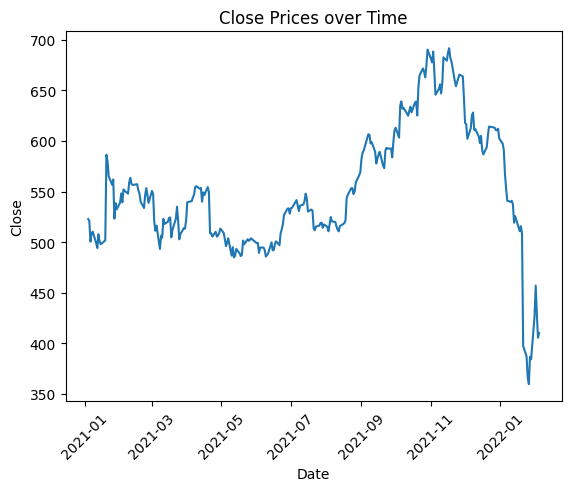

In [43]:
# CSV 파일을 DataFrame으로 읽어오기 (Data, Open, High, Low, Close)
df = pd.read_csv(csv_path, usecols=range(5))

# 날짜 데이터를 타임스탬프(datetime) 형태로 변환
df["Date"] = pd.to_datetime(df["Date"])

# 2021년 이후 데이터 필터링
df_after_2021 = df[df["Date"] >= "2021-01-01"]

# 그래프 그리기 (가로, 세로 축에 표시될 데이터를 차례로 기입)
plt.plot(df_after_2021['Date'], df_after_2021['Close'])

# 그래프 제목 설정
plt.title('Close Prices over Time')

# x축 레이블 설정
plt.xlabel('Date')
plt.xticks(rotation=45)

# y축 레이블 설정
plt.ylabel('Close')

# 그래프 표시
plt.show()

---

### C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [ ]:
# CSV 파일을 DataFrame으로 읽어오기 (Data, Open, High, Low, Close)
df = pd.read_csv(csv_path, usecols=range(5))

# 2021년 이후 데이터 필터링
df_after_2021 = df[df["Date"] >= "2021-01-01"]

max_price = max(list(df_after_2021['Close']))
min_price = min(list(df_after_2021['Close']))

print('최고 종가:', max_price)
print('최저 종가:', min_price)

최고 종가: 691.690002
최저 종가: 359.700012


---

### D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기

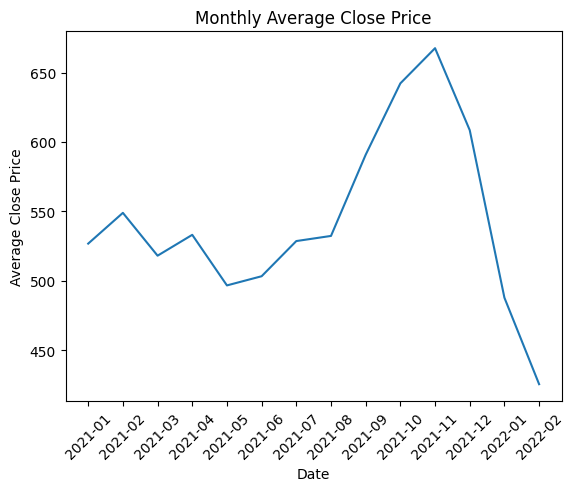

In [41]:
# CSV 파일을 DataFrame으로 읽어오기 (Date, Close)
df = pd.read_csv(csv_path, usecols=['Date', 'Close'])

# 2021년 이후 데이터 필터링
df = df[df["Date"] >= "2021-01-01"]

# 날짜 데이터를 타임스탬프(datetime) 형태로 변환
df["Date"] = pd.to_datetime(df["Date"])

# 월별 그룹화 (인덱스 없어지고 카테고리 Date가 아래 행으로 이동)
df['Date'] = df["Date"].dt.strftime("%Y-%m")
df = df.groupby('Date').mean()

# 인덱스 초기화 및 카테고리 행을 한 줄로 통일
df_after_2021 = df.reset_index()

# 그래프 설정 및 출력
plt.plot(df_after_2021['Date'], df_after_2021['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Average Close Price')
plt.show()

---

### E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기

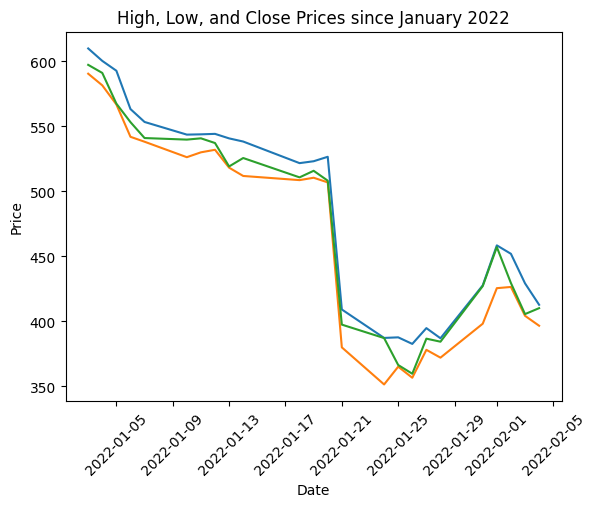

In [47]:
# CSV 파일을 DataFrame으로 읽어오기 (Date, Open, High, Low, Close)
df = pd.read_csv(csv_path, usecols=['Date', 'High', 'Low', 'Close'])

# 2022년 이후 데이터 필터링
df = df[df["Date"] >= "2022-01-01"]

# 날짜 데이터를 타임스탬프(datetime) 형태로 변환
df["Date"] = pd.to_datetime(df["Date"])

# 그래프 설정 및 출력
plt.plot(df['Date'], df['High'])
plt.plot(df['Date'], df['Low'])
plt.plot(df['Date'], df['Close'])
plt.title('High, Low, and Close Prices since January 2022')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.show()